In [1]:
import pygad
import numpy as np

In [14]:
import deminf_data

In [15]:
objective1 = deminf_data.Objective.from_name('1_Bot_4_Sim', negate=True, type_of_transform='logarithm')

In [16]:
genes_space = []
for l, r in zip(objective1.lower_bound, objective1.upper_bound):
    genes_space.append({'low':l, 'high':r})

In [17]:
genes_space

[{'low': -6.907755278982137, 'high': 4.605170185988092},
 {'low': -6.907755278982137, 'high': 4.605170185988092},
 {'low': -34.538776394910684, 'high': 1.6094379124341003},
 {'low': -34.538776394910684, 'high': 1.6094379124341003}]

In [22]:
def fitness_func(solution, solution_idx):
    return -objective1(solution)

fitness_function = fitness_func

num_generations = 100 # Number of generations.
num_genes = len(genes_space)
sol_per_pop = 50

last_fitness = 0
def callback_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution()[1] - last_fitness))
    last_fitness = ga_instance.best_solution()[1]

# Creating an instance of the GA class inside the ga module. Some parameters are initialized within the constructor.
ga_instance = pygad.GA(num_generations=num_generations, 
                       num_parents_mating=5,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       gene_space=genes_space,
                       on_generation=callback_generation)

/home/artem/anaconda3/lib/python3.8/site-packages/pygad/pygad.py:357: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))


In [23]:
# Running the GA to optimize the parameters of the function.
ga_instance.run()

Generation = 1
Fitness    = -1242.7482635661845
Change     = -1242.7482635661845
Generation = 2
Fitness    = -921.4800868002876
Change     = 321.2681767658969
Generation = 3
Fitness    = -524.1531316498304
Change     = 397.32695515045725
Generation = 4
Fitness    = -395.9934140404548
Change     = 128.15971760937555
Generation = 5
Fitness    = -395.9932186586839
Change     = 0.00019538177093636477
Generation = 6
Fitness    = -395.9932186586839
Change     = 0.0
Generation = 7
Fitness    = -395.58145226091074
Change     = 0.4117663977731354
Generation = 8
Fitness    = -395.5809206547938
Change     = 0.0005316061169651221
Generation = 9
Fitness    = -392.9420007306462
Change     = 2.638919924147558
Generation = 10
Fitness    = -392.9420007306462
Change     = 0.0
Generation = 11
Fitness    = -392.9420007306462
Change     = 0.0
Generation = 12
Fitness    = -392.9420007306462
Change     = 0.0
Generation = 13
Fitness    = -392.9419700202652
Change     = 3.071038099733414e-05
Generation = 14
Fi

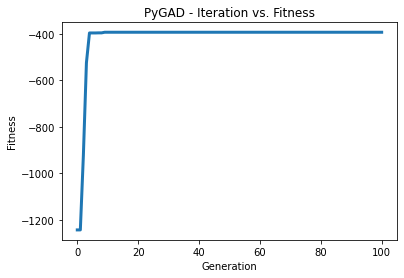

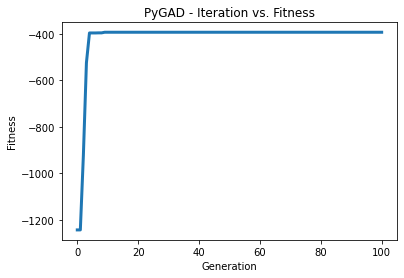

In [24]:
# After the generations complete, some plots are showed that summarize the how the outputs/fitenss values evolve over generations.
ga_instance.plot_result()

In [25]:
# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

Parameters of the best solution : [ 3.65368735 -6.31773485 -2.68838687 -4.40885525]
Fitness value of the best solution = -392.9414983150955
Index of the best solution : 0
